# Банки — Сегментация пользователей по потреблению.

# Материалы:
- Презентация https://drive.google.com/file/d/1yOrPYg8WSdmKexzULz39m9Cd-VGmiJmF/view?usp=sharing
- Дашборд https://public.tableau.com/app/profile/olya.kaydan/viz/_16249985248790/Dashboard2

# Описание проекта

Банк «Метанпром» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Цель: выделение основных целевых аудиторий для дальнейшей разработки программы мероприятий для каждой. 

Пользователь и заказчик проекта: менеджер продукта.

Исследование является регулярным.

# Задачи

Анализ клиентов регионального банка и сегментация пользователей по количеству потребляемых продуктов.
- Проведение исследовательского анализа данных,
- Сегментация пользователей на основе данных о количестве потребляемых продуктов,
- Формулирование и проверка статистических гипотез.

# Описание данных:

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li></ul></li><li><span><a href="#Кластеризация-пользователей-на-основе-данных-о-количестве-потребляемых-продуктов" data-toc-modified-id="Кластеризация-пользователей-на-основе-данных-о-количестве-потребляемых-продуктов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация пользователей на основе данных о количестве потребляемых продуктов</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Формулировка-и-проверка-статистических-гипотез" data-toc-modified-id="Формулировка-и-проверка-статистических-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Формулировка и проверка статистических гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-о-различии-дохода-между-теми-клиентами,-которые-пользуются-двумя-продуктами-банка,-и-теми,-которые-пользуются-одним" data-toc-modified-id="Гипотеза-о-различии-дохода-между-теми-клиентами,-которые-пользуются-двумя-продуктами-банка,-и-теми,-которые-пользуются-одним-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Гипотеза о различии дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним</a></span></li><li><span><a href="#Гипотеза-о-разнице-в-количестве-баллов-кредитного-скоринга,-которые-пользуются-тремя-продуктами-банка,-и-теми,-которые-пользуются-одним" data-toc-modified-id="Гипотеза-о-разнице-в-количестве-баллов-кредитного-скоринга,-которые-пользуются-тремя-продуктами-банка,-и-теми,-которые-пользуются-одним-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Гипотеза о разнице в количестве баллов кредитного скоринга, которые пользуются тремя продуктами банка, и теми, которые пользуются одним</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

## Загрузка данных

In [1]:
# импортируем библиотеки
!pip install seaborn==0.11.1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from matplotlib import pyplot
from plotly.subplots import make_subplots
from scipy import stats as st
import plotly.graph_objects as go
from scipy.stats import mannwhitneyu


from scipy.cluster.hierarchy import dendrogram, linkage 


from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 285 kB 1.6 MB/s eta 0:00:01


In [2]:
# записываем данные в табличку

df = pd.read_csv('/datasets/bank_dataset.csv')

In [3]:
# смотрим инфо

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
userid              10000 non-null int64
score               10000 non-null int64
City                10000 non-null object
Gender              10000 non-null object
Age                 10000 non-null int64
Objects             10000 non-null int64
Balance             6383 non-null float64
Products            10000 non-null int64
CreditCard          10000 non-null int64
Loyalty             10000 non-null int64
estimated_salary    10000 non-null float64
Churn               10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
# отрисовываем первые пять строк

display(df.head())

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Был открыт и изучен файл с предоставленными данными. Обнаружены пропуски, а также разный регистр букв в наименованиях большинства колонок.

## Предобработка данных

In [5]:
# приводим к лоуеркейсу названия колонок

df.columns = [each.lower() for each in df]

In [6]:
# смотрим пропуски

df.isna().sum()

userid                 0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
creditcard             0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

In [7]:
# посмотрим средние значения и отклонения для колонки с пропусками

df['balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64

In [8]:
# заменим пропуски на нули - допустим, Nan обозначают те позиции, где у клиента нулевой баланс на карте

df = df.fillna(0)

In [9]:
# смотрим дубли

df.duplicated().sum()

0

### Выводы

Были приведены к нижнему регистру названия колонок. Затем при проверке пропусков они были обнаружены в колонке `balance`, поэтому мы описали значения колонок при помощи `describe`. Минимальная сумма на счету была равна при этом 3768.69. Предположим, пропущенные значения равны нулевому балансу - такое может произойти в том случае, если банковски продукт был приобретен, но ни разу не использовался, либо просто при полном снятии денег со счета, поэтому мы заменили пропуски на нули. В любом случае, предпочтительнее уточнить при возможности природу таких пропусков у коллег, которые предоставили данный датасет.

## Исследовательский анализ данных (EDA)

In [10]:
# посмотрим на датасет: есть ли в нем отсутствующие признаки, 
# изучим средние значения и стандартные отклонения

df.describe()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Интересно отметить, что у большинства клиентов есть кредитная карта, самому старшему держателю продукта 92 года, отток у нас в выборке небольшой, в среднем люди используют один-два продукта, и владеют пятью объектами. Странно выглядит минимальная зарплата в 11.58.

In [11]:
# Посмотрим на средние значения признаков в группах по количеству используемых продуктов

display(df.groupby('products').mean())

,userid,score,age,objects,balance,creditcard,loyalty,estimated_salary,churn
products,,,,,,,,,
1,1.573237e+07,649.120968,39.673092,4.974626,98551.870614,0.703777,0.504131,99487.256851,0.277144
2,1.573484e+07,652.188671,37.753595,5.051852,51879.145813,0.707190,0.532898,100452.012821,0.075817
3,1.574182e+07,648.105263,43.195489,5.003759,75458.328195,0.714286,0.424812,104318.130564,0.827068
4,1.571936e+07,653.583333,45.683333,5.300000,93733.135000,0.683333,0.483333,104763.723333,1.000000


Средние показатели у пользователей с разным количеством продуктов во многом схожи, но баланс на счету ниже у тех, кто пользуется двумя-тремя продуктами, а еще все владельцы четырех продуктов попали в группу оттока.

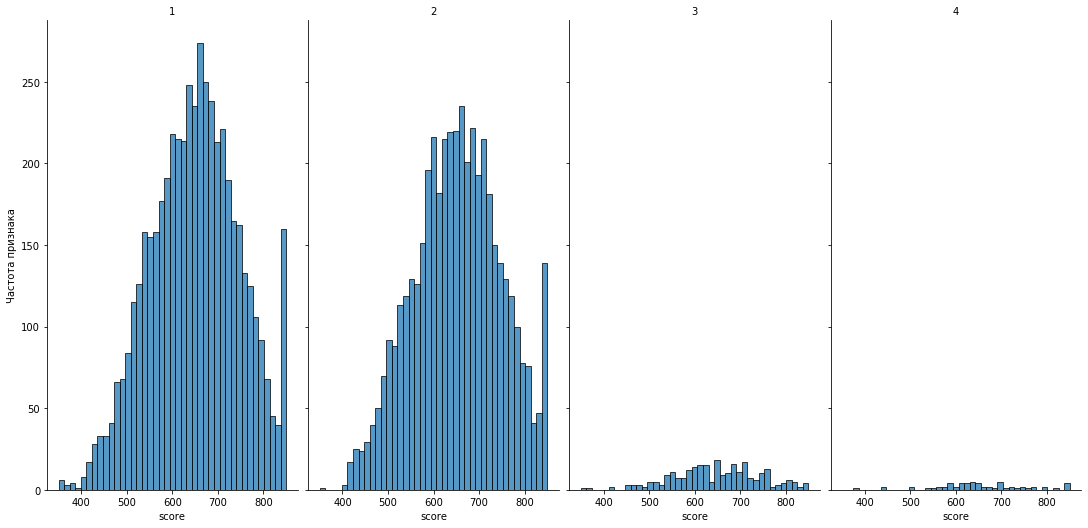

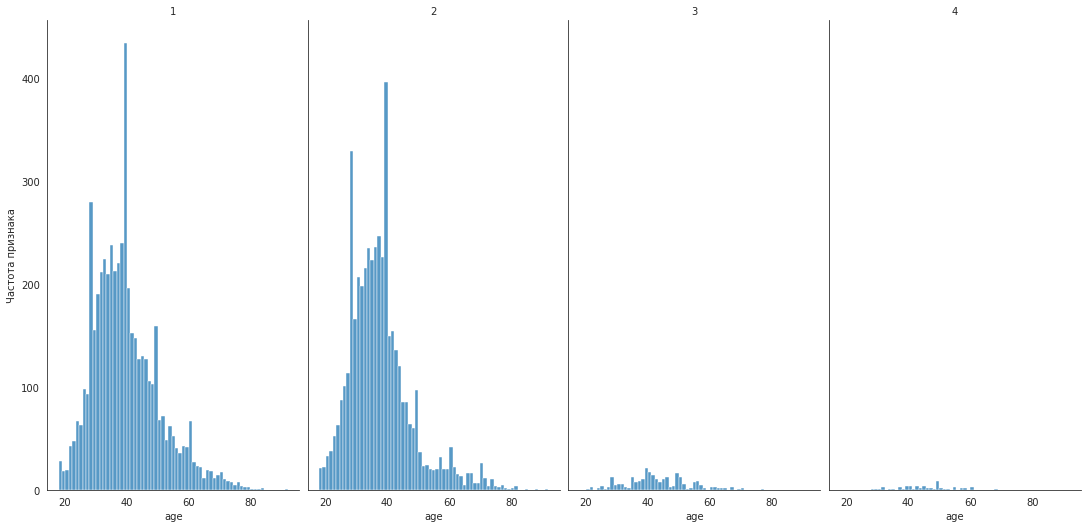

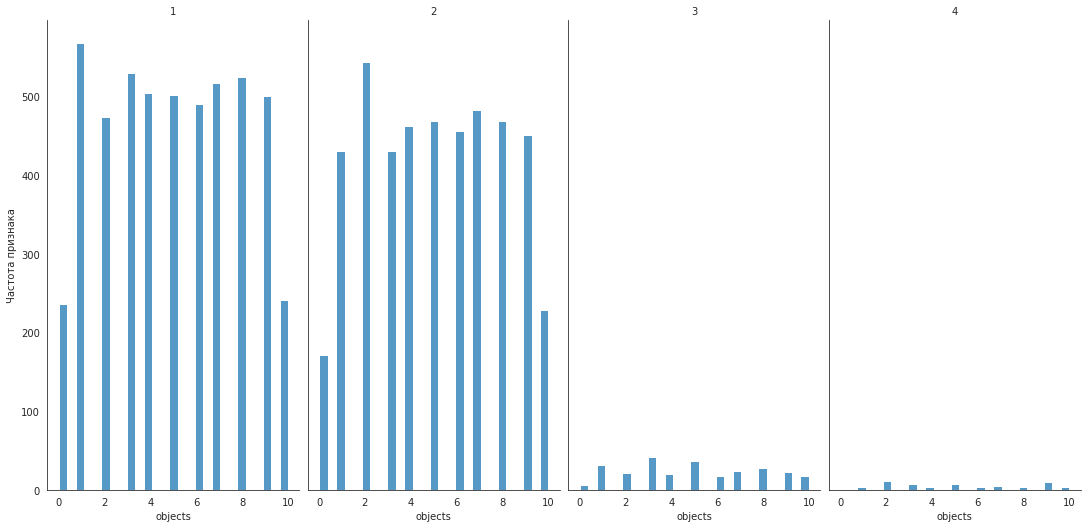

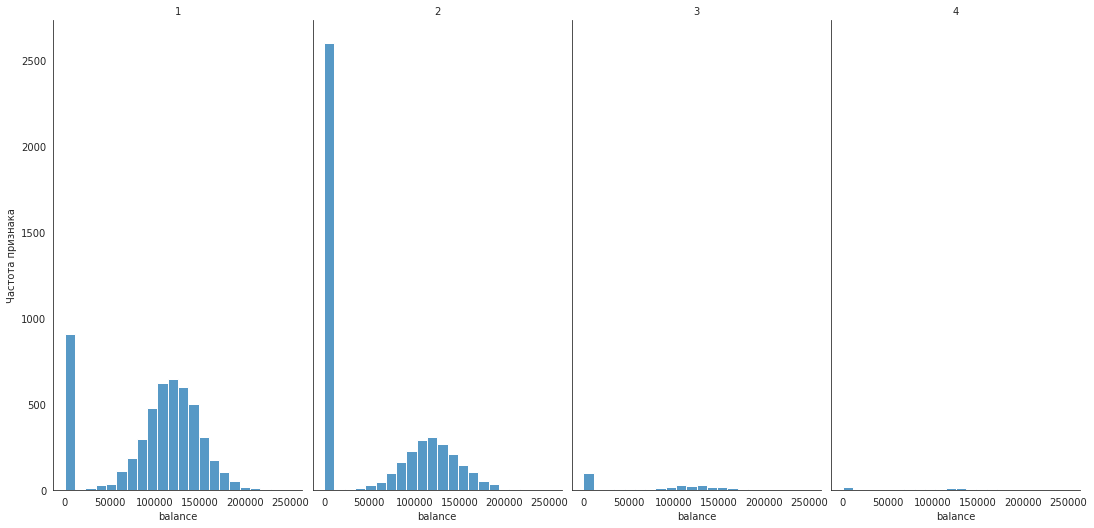

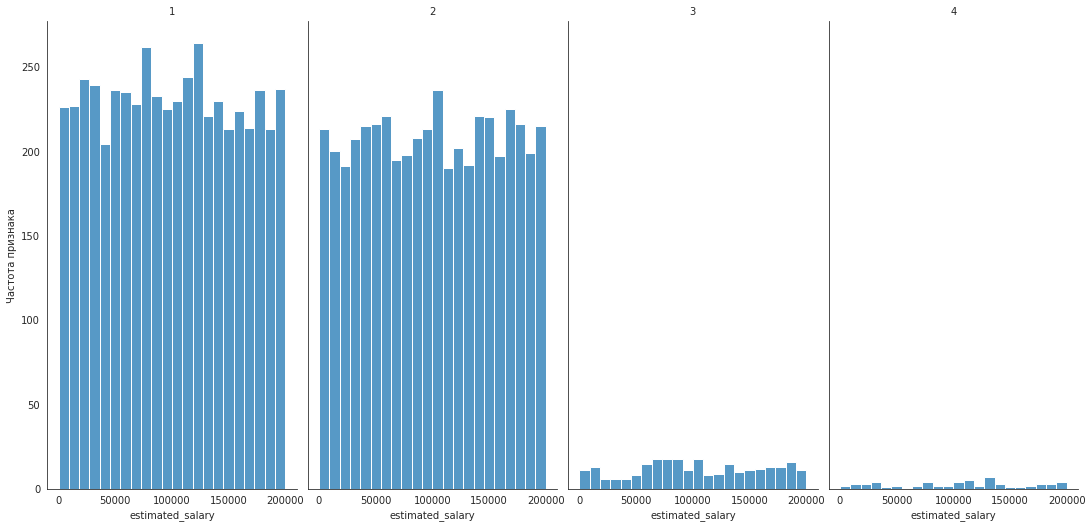

In [13]:
X = df.drop(['creditcard', 'loyalty', 'churn', 'products', 'userid', 'city', 'gender'], axis = 1)
for col in X.columns:
    g = sns.displot(data = df, x = col, col = 'products', palette = "pastel")
    sns.set_style(style='white')
    g.fig.set_figwidth(15)
    g.fig.set_figheight(8)
    g.set_axis_labels(col, 'Частота признака')
    g.set_titles('{col_name}')
    plt.show()

Скоринговый балл для всех групп имеет нормальное распределение - так же, как и для возраста. Если бы не возникшие вопросы по поводу пропусков в балансе, то здесь тоже было бы нормальное распределение, но на данный момент мы имеем большое количество околонулевых значений. Для зарплат и количества объектов мы видим равномерное распределение (с пиками в зарплате у держателей трех и четырех продуктов).

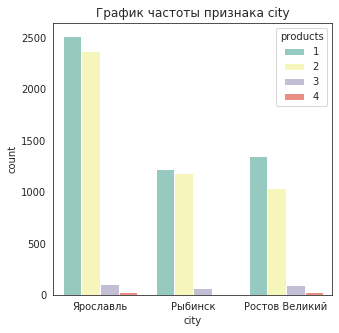

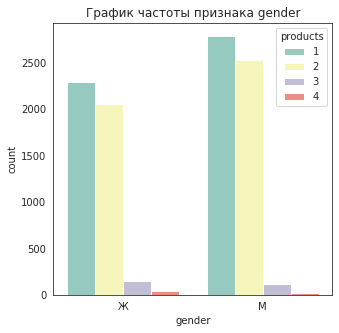

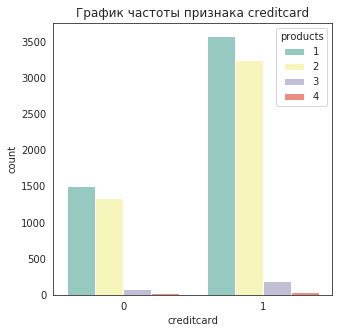

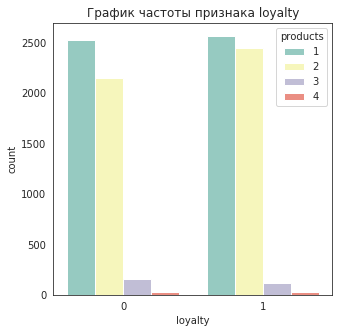

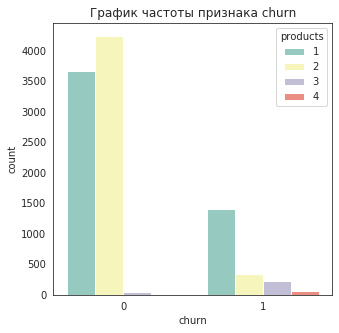

In [14]:
# столбчатые гистограммы признаков в группах по количеству используемых продуктов

for col in df.drop(['userid', 'score', 'age', 'products', 'objects', 'balance', 'estimated_salary'], axis = 1).columns:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[col], hue = 'products', palette='Set3', data = df)
    plt.title('График частоты признака {}'.format(col))
    plt.show()

Самое большое количество клиентов - из Ярславля, в Рыбинске и Ростове Великом в два раза меньше (логично, учитывая плотность населения). Среди клиентов немного больше мужчин, и в два раза больше владельцев кредитных карт, чем тех, у кого их нет. Частота признака loyalty примерно одинакова. С оттоком самый интересный график - владельцы трех продуктов чаще уходят из банка, чем те, у кого их один или два, а вот держатели четырех продуктов полностью ушли в группу оттока.

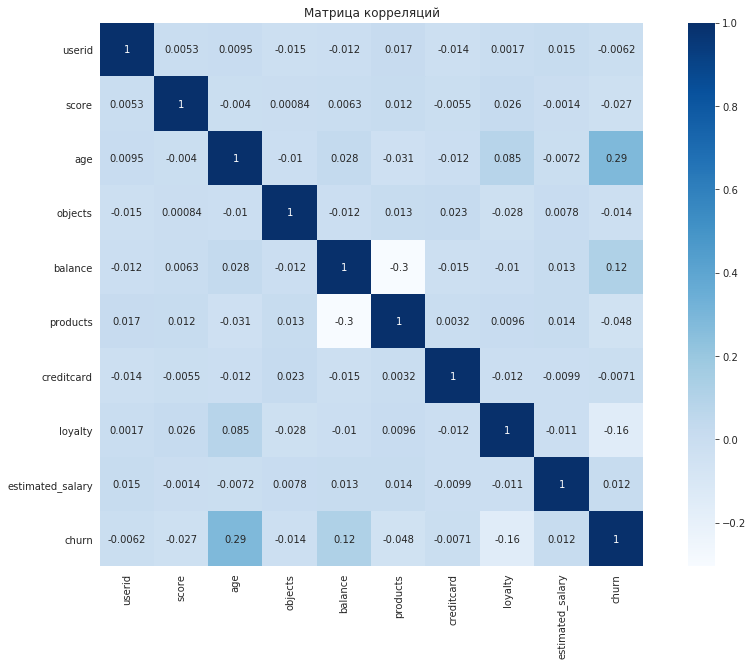

In [15]:
# строим матрицу корреляций 

cm = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(cm, annot = True, square = True, cmap = "Blues")
plt.title('Матрица корреляций')
plt.show()

Коррелируют следующие признаки:
- Отток и возраст
- Отток и баланс на счету
- Возраст и лояльность
- Баланс и количество продуктов

#### Выводы

В целом, у нас складываются похожие картины для держателей всех четырех продуктов, за исключением информации по оттоку, в столбчатых гистограммах мы заметили, что большое количество клиентов с тремя продуктами ушли в отток, так же как и все владельцы четырех продуктов банка.

## Кластеризация пользователей на основе данных о количестве потребляемых продуктов

In [16]:
X = df.drop(['products', 'city', 'gender'], axis = 1)
#X = X.dropna()
y = df['products']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 

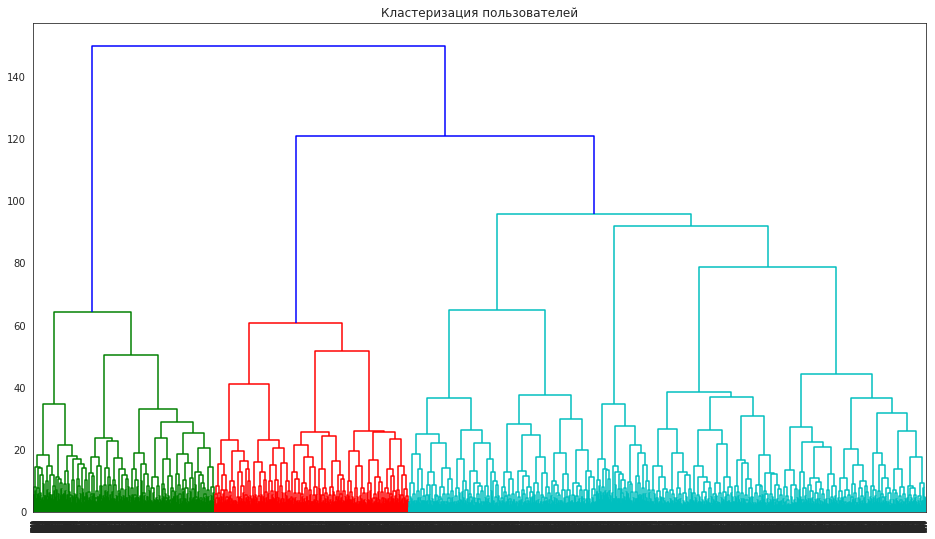

In [18]:
# отрисуем дендрограмму

plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

In [19]:
km = KMeans(n_clusters = 3, random_state=0)
labels = km.fit_predict(X_sc)
df['cluster'] = labels

In [20]:
df

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,cluster
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,101348.88,1,0
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,2
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,0
3,15744090,699,Ярославль,Ж,39,1,0.00,2,0,0,93826.63,0,1
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,0.00,2,1,0,96270.64,0,1
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0,2
9997,15627268,709,Ярославль,Ж,36,7,0.00,1,0,1,42085.58,1,0
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1,0


In [21]:
# выводим статистику по средним значениям наших признаков по кластеру

pd.options.display.float_format = '{:,.1f}'.format
df.groupby(['cluster']).mean().T

cluster,0,1,2
userid,"15,732,788.0","15,733,938.3","15,733,876.2"
score,645.4,648.9,654.2
age,44.8,35.5,39.0
objects,4.9,5.1,5.0
balance,"91,108.5","72,048.8","73,304.7"
products,1.5,1.6,1.5
creditcard,0.7,0.7,0.7
loyalty,0.4,0.0,1.0
estimated_salary,"101,465.7","100,342.6","99,253.1"
churn,1.0,0.0,0.0


In [22]:
# смотрим средние значения для каждого из продуктов
df.groupby(['products']).mean().T

products,1,2,3,4
userid,"15,732,367.9","15,734,841.5","15,741,816.5","15,719,361.3"
score,649.1,652.2,648.1,653.6
age,39.7,37.8,43.2,45.7
objects,5.0,5.1,5.0,5.3
balance,"98,551.9","51,879.1","75,458.3","93,733.1"
creditcard,0.7,0.7,0.7,0.7
loyalty,0.5,0.5,0.4,0.5
estimated_salary,"99,487.3","100,452.0","104,318.1","104,763.7"
churn,0.3,0.1,0.8,1.0
cluster,1.1,1.4,0.3,0.0


In [23]:
# посмотрим на количество людей, которые пользуются различным числом продуктов

df['products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

### Выводы

В итоговой табличке мы видим, что клиенты с одним продуктом попали в основном в первый кластер, с двумя продуктами - во второй, с тремя и четырьмя - в нулевой. Выделяются: возраст - он примерно находится примерно на уровне 45 лет в среднем для владельцев 3-4 продуктов, что выше на 5-10 лет, чем у остальных; лояльность также ниже у владельцев большого количества продуктов; а также показатель оттока - все из нулевого кластера (в основном с 3-4 продуктами) находятся в оттоке.

## Формулировка и проверка статистических гипотез

### Гипотеза о различии дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

Нулевая гипотеза: распределение дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним одинаково. Альтернативная гипотеза: распределение дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним различается. Пороговое значение альфа устанавливаем равным 5%. Критерий для проверки гипотез: u-критерий Манна-Уитни.

In [24]:
# проверяем нулевую гипотезу о равенстве распределения дохода между теми клиентами, 
# которые пользуются двумя продуктами банка, и теми, которые пользуются одним

prod_1_salary = df.query('products == "1"')['estimated_salary']
prod_2_salary = df.query('products == "2"')['estimated_salary']

stat, p = mannwhitneyu(prod_1_salary, prod_2_salary)
alpha = 0.05
if p > alpha:
    print('Распределение одинаковое (Не удалось отвергнуть нулевую гипотезу)')
else:
    print('Распределение различается (Отвергаем нулевую гипотезу)')

Распределение одинаковое (Не удалось отвергнуть нулевую гипотезу)


### Гипотеза о разнице в количестве баллов кредитного скоринга, которые пользуются тремя продуктами банка, и теми, которые пользуются одним

Скоринговый балл – это показатель платежеспособности заемщика, выраженный в цифровом формате. Чем больше балл, тем выше вероятность одобрения заявки. Даже с нулевой кредитной историей заемщик будет иметь свой рейтинг. Он будет зависеть от пола, возраста, места работы, должности, наличия собственности и т. д.

Нулевая гипотеза: средние показатели кредитного скоринга между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним одинаковы. Альтернативная гипотеза: средние показатели кредитного скоринга между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним различаются. Пороговое значение альфа устанавливаем равным 5%. Критерий для проверки гипотез: t-Критерий Стьюдента. Устанавливаем equal_var = False, так как дисперсии выборок нельзя считать равными.

In [25]:
# проверяем нулевую гипотезу о равенстве показателей кредитного скоринга между теми клиентами, 
# которые пользуются тремя продуктами банка, и теми, которые пользуются одним

prod_1_score = df.query('products == "1"')['score']
prod_3_score = df.query('products == "3"')['score']

alpha = .05
result = st.ttest_ind(prod_1_score, prod_3_score, equal_var = False)
print('p-value равен', result.pvalue)
if  result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-value равен 0.8655472062730479
Не удалось отвергнуть нулевую гипотезу


### Выводы

По полученным данным были проведены проверки двух гипотез: о равенстве дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, а также о рвенстве в количестве баллов кредитного скоринга, которые пользуются тремя продуктами банка, и теми, которые пользуются одним. В обоих случаях отвергнуть нулевую гипотезу не удалось.

## Выводы и рекомендации

Были выявлены несколько определяющих признаков при разделении на четыре группы (по количеству продуктов у клиента):
- возраст (больше у владельцев бОльшего числа продуктов);
- лояльность (ниже у владельцев бОльшего числа продуктов);
- отток (выше у владельцев бОльшего числа продуктов);
- пол (в основном, женщины среди владельцев четырех продуктов).

По проверенным гипотезам о равенстве дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, а также о рвенстве в количестве баллов кредитного скоринга, которые пользуются тремя продуктами банка, и теми, которые пользуются одним, ни одну из гипотез отвергнуть не удалось.

На основании проведенного анализа и сегментации пользователей можно сделать следующие рекомендации:
- поддерживать клиентов из 1 и 2 кластера, то есть тех, которые меньше стремятся к оттоку - это владельцы одного-двух продуктов;
- для привлечения новых клиентов сосредоточиться на таких, которые будут соответствовать портрету вышеуказанных кластеров (возраст ближе к 35 годам, мужчины),
- создать и развить маркетинговую стратегию для удержания в дальнейшем клиентов-владельцев трех-четырех продуктов, так как их общие показатели (баллы кредитного скоринга, заработная плата, баланс) не ниже, чем у других групп, НО данная рекомендация жизнеспособна только в том случае, если LTV соответствующих групп не ниже необходимого, так как само по себе количество клиентов в этих группах достаточно мало.